In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Now, We need to prepare our data to feed into the model. There is a builtin method in [Keras](https://keras.io/preprocessing/image/) that can extract your images from folders. But, I recommend you to make your own function for this purpose so you can practice the python.

Following is the gernalized function used to extract data from the directory.

In [ ]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [ ]:
train_dir = "/content/drive/MyDrive/seg_train/"
test_dir = "/content/drive/MyDrive/seg_test/seg_test/"
x_train,y_train = get_images(train_dir)
x_test,y_test = get_images(test_dir)
x_train = np.array(x_train) 
y_train = np.array(y_train)
x_test = np.array(x_test) 
y_test = np.array(y_test)

In [ ]:
x_train = np.array(x_train) 
y_train = np.array(y_train)

x_test = np.array(x_test) 
y_test = np.array(y_test)

We should track down the state of our preparation information.

As you see, The Training information is looking like this (The number of Training Images, Width of the picture, Height of the picture, Channel of the picture). This shape is vital. In the event that you didn't resize the pictures to a similar size. It would be ideal for it to be (No. of pictures,) shape. Along these lines, utilizing this shape you cant feed the pictures to the model.

In [ ]:
print("Shape of Images:",x_train.shape)
print("Shape of Labels:",y_train.shape)

Shape of Images: (13506, 150, 150, 3)
Shape of Labels: (13506,)


Let us look some random images of our dataset.

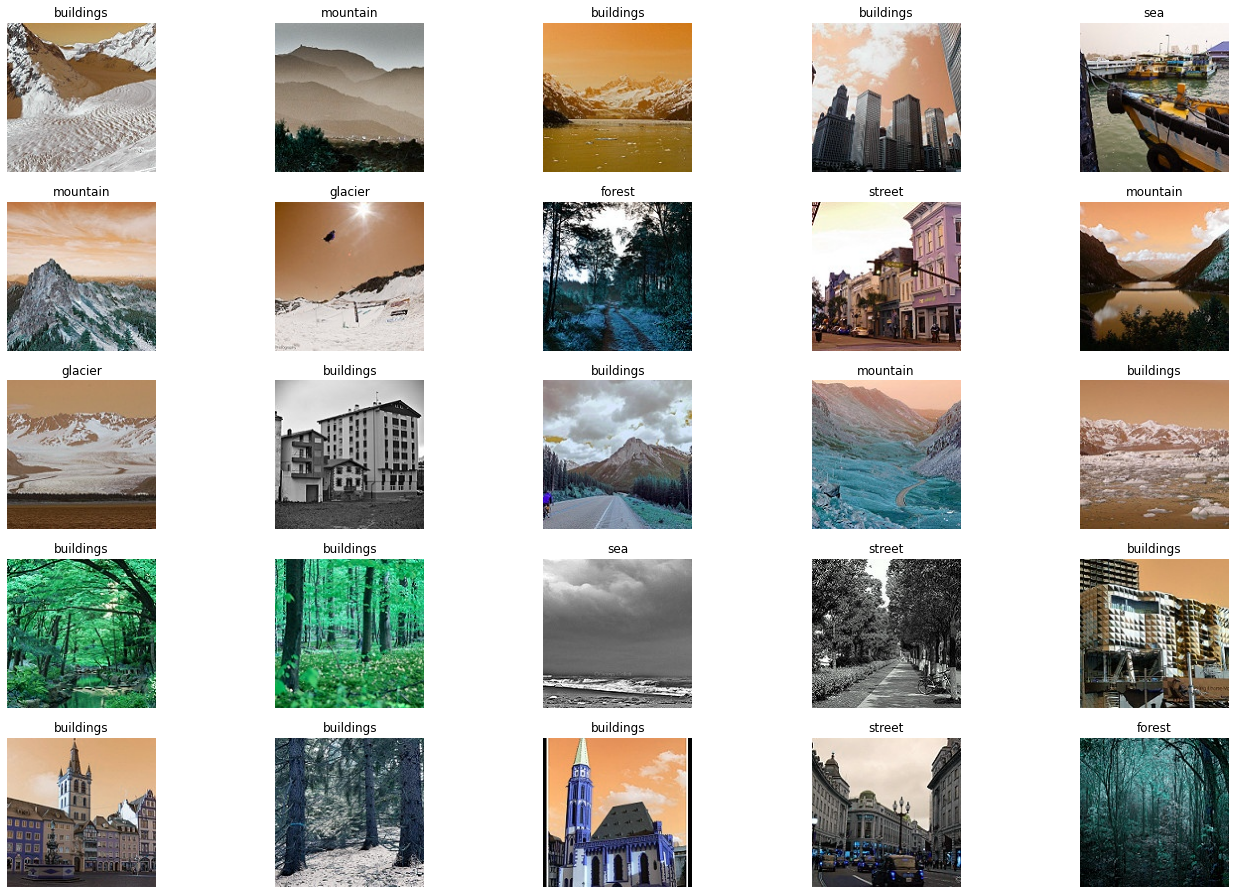

In [ ]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(x_train))
        ax[i,j].imshow(x_train[rnd_number])
        ax[i,j].set_title(get_classlabel(y_train[rnd_number]))
        ax[i,j].axis('off')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 146, 146, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 10)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 71, 71, 10)        910       
                                                                 
 conv2d_19 (Conv2D)          (None, 69, 69, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 34, 34, 10)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


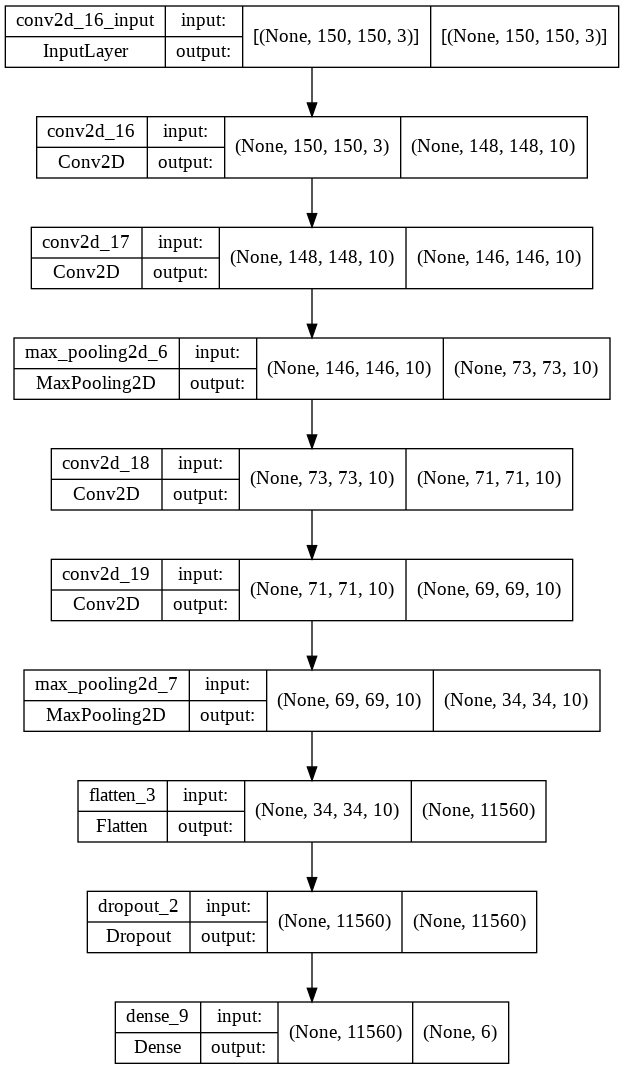

In [ ]:
model = Models.Sequential()

model.add(Layers.Conv2D(10,3,activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(10,3,activation='relu'))
model.add(Layers.MaxPool2D(pool_size=2))
model.add(Layers.Conv2D(10,3,activation='relu'))
model.add(Layers.Conv2D(10,3,activation='relu'))
model.add(Layers.MaxPool2D())
model.add(Layers.Flatten())
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
trained = model.fit(x_train,y_train,epochs=35)

Epoch 1/35
423/423 [==============================] - 14s 19ms/step - loss: 6.1461 - accuracy: 0.5004
Epoch 2/35
423/423 [==============================] - 8s 18ms/step - loss: 1.4929 - accuracy: 0.5151
Epoch 3/35
423/423 [==============================] - 8s 19ms/step - loss: 1.1541 - accuracy: 0.5772
Epoch 4/35
423/423 [==============================] - 8s 20ms/step - loss: 0.9293 - accuracy: 0.6490
Epoch 5/35
423/423 [==============================] - 8s 19ms/step - loss: 0.8045 - accuracy: 0.6849
Epoch 6/35
423/423 [==============================] - 8s 20ms/step - loss: 0.7315 - accuracy: 0.7087
Epoch 7/35
423/423 [==============================] - 8s 19ms/step - loss: 0.6639 - accuracy: 0.7273
Epoch 8/35
423/423 [==============================] - 8s 19ms/step - loss: 0.6109 - accuracy: 0.7502
Epoch 9/35
423/423 [==============================] - 8s 19ms/step - loss: 0.5641 - accuracy: 0.7703
Epoch 10/35
423/423 [==============================] - 8s 20ms/step - loss: 0.5271 - accur

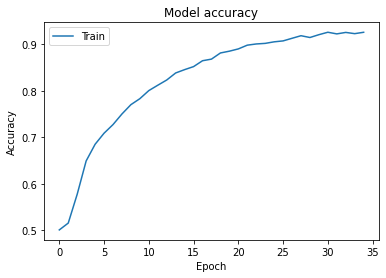

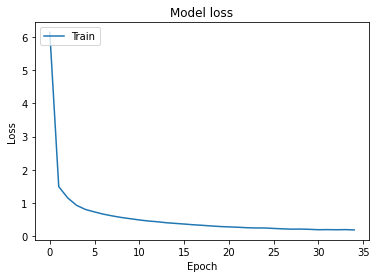

In [ ]:
plot.plot(trained.history['accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train'], loc='upper left')
plot.show()

To evaluate a model, there are many methods are proposed to evaluate the model. I use Accuracy to evaluate the performance of my model.

In [ ]:
model.evaluate(x_test,y_test, verbose=1)

94/94 [==============================] - 1s 8ms/step - loss: 16.6442 - accuracy: 0.4650


[16.644222259521484, 0.4650000035762787]

**NOTE** The Accuracy of our model on training set was very good but on test set it is not much effective so we train an other model with validation set.

In [ ]:
model.save('first_model.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 200)     5600      
                                                                 
 conv2d_21 (Conv2D)          (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 29, 29, 180)      0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 27, 27, 180)       291780    
                                                                 
 conv2d_23 (Conv2D)          (None, 25, 25, 140)       226940    
                                                                 
 conv2d_24 (Conv2D)          (None, 23, 23, 50)        63050     
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


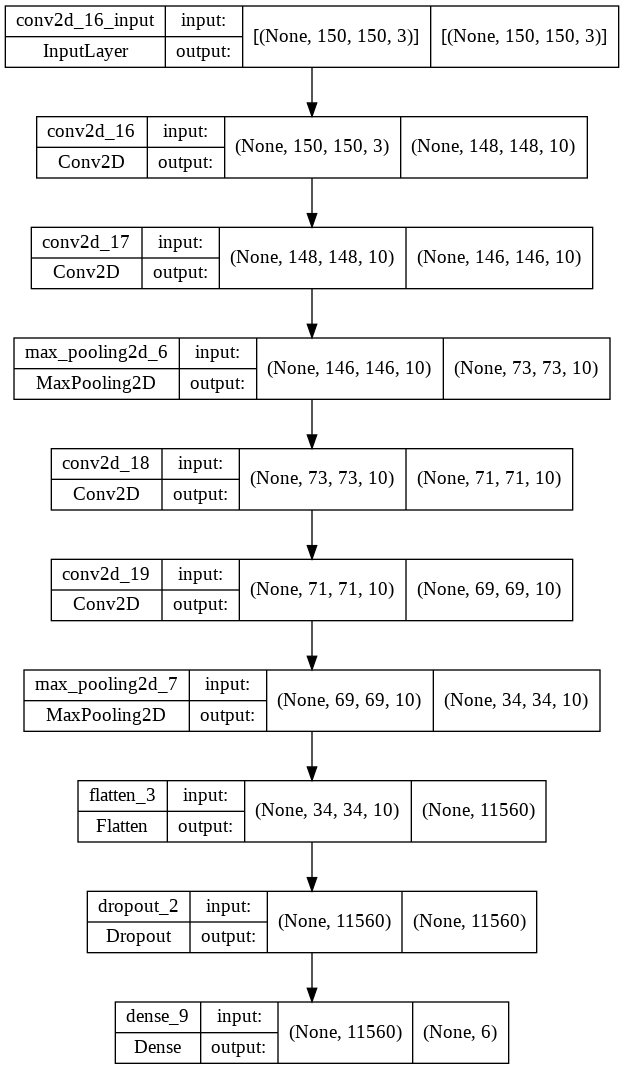

In [ ]:
model2 = Models.Sequential()

model2.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model2.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model2.add(Layers.MaxPool2D(5,5))
model2.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model2.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model2.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model2.add(Layers.MaxPool2D(5,5))
model2.add(Layers.Flatten())
model2.add(Layers.Dense(180,activation='relu'))
model2.add(Layers.Dense(50,activation='relu'))
model2.add(Layers.Dropout(rate=0.5))
model2.add(Layers.Dense(6,activation='softmax'))

model2.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model2.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

Now, lets train the model with validation split equal to 25% from training 
data. Validation split is used to determine that our model is not geting over-fitted.

In [ ]:
trained = model2.fit(x_train,y_train,epochs=35,validation_split=0.25)

Epoch 1/35
317/317 [==============================] - 92s 276ms/step - loss: 1.4080 - accuracy: 0.4754 - val_loss: 0.8562 - val_accuracy: 0.6494
Epoch 2/35
317/317 [==============================] - 88s 278ms/step - loss: 0.9452 - accuracy: 0.6032 - val_loss: 0.7572 - val_accuracy: 0.6757
Epoch 3/35
317/317 [==============================] - 90s 283ms/step - loss: 0.8687 - accuracy: 0.6475 - val_loss: 0.7027 - val_accuracy: 0.7083
Epoch 4/35
317/317 [==============================] - 91s 287ms/step - loss: 0.7934 - accuracy: 0.6767 - val_loss: 0.6670 - val_accuracy: 0.7498
Epoch 5/35
317/317 [==============================] - 92s 289ms/step - loss: 0.7238 - accuracy: 0.7078 - val_loss: 0.5730 - val_accuracy: 0.7631
Epoch 6/35
317/317 [==============================] - 92s 290ms/step - loss: 0.6691 - accuracy: 0.7392 - val_loss: 0.5986 - val_accuracy: 0.7601
Epoch 7/35
317/317 [==============================] - 91s 289ms/step - loss: 0.6162 - accuracy: 0.7693 - val_loss: 0.4767 - val_ac

In [ ]:
model2.evaluate(x_test,y_test, verbose=1)

94/94 [==============================] - 9s 95ms/step - loss: 14.9293 - accuracy: 0.5597


[14.929291725158691, 0.5596666932106018]

our accuracy on test set improved but not as much as we excpected. Now we need to train with less number of Epochs.

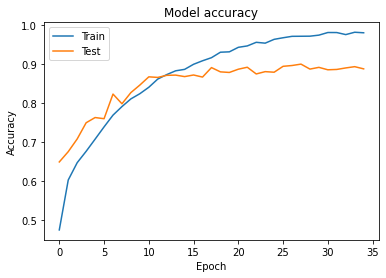

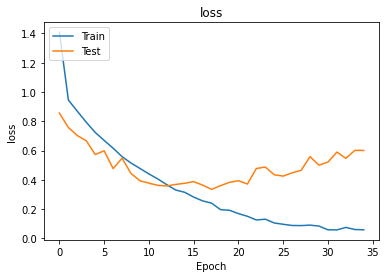

In [ ]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('loss')
plot.ylabel('loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
model2.save('Second_model.h5')

In [ ]:
model_3 = Models.Sequential()

model_3.add(Layers.Conv2D(240,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model_3.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu'))
model_3.add(Layers.MaxPool2D(5,5))
model_3.add(Layers.Conv2D(160,kernel_size=(3,3),activation='relu'))
model_3.add(Layers.Conv2D(120,kernel_size=(3,3),activation='relu'))
model_3.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model_3.add(Layers.Conv2D(80,kernel_size=(3,3),activation='relu'))
model_3.add(Layers.Conv2D(60,kernel_size=(3,3),activation='relu'))
model_3.add(Layers.MaxPool2D(5,5))
model_3.add(Layers.Flatten())
model_3.add(Layers.Dense(120,activation='relu'))
model_3.add(Layers.Dense(60,activation='relu'))
model_3.add(Layers.Dropout(rate=0.5))
model_3.add(Layers.Dense(6,activation='softmax'))

model_3.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_3.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 240)     6720      
                                                                 
 conv2d_26 (Conv2D)          (None, 146, 146, 200)     432200    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 29, 29, 200)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 27, 27, 160)       288160    
                                                                 
 conv2d_28 (Conv2D)          (None, 25, 25, 120)       172920    
                                                                 
 conv2d_29 (Conv2D)          (None, 23, 23, 100)       108100    
                                                      

In [ ]:
trained = model_3.fit(x_train,y_train,epochs=25,validation_split=0.3)

Epoch 1/25
296/296 [==============================] - 108s 351ms/step - loss: 1.1592 - accuracy: 0.5541 - val_loss: 0.7559 - val_accuracy: 0.6940
Epoch 2/25
296/296 [==============================] - 105s 355ms/step - loss: 0.8585 - accuracy: 0.6571 - val_loss: 0.7674 - val_accuracy: 0.6661
Epoch 3/25
296/296 [==============================] - 108s 364ms/step - loss: 0.7332 - accuracy: 0.7058 - val_loss: 0.6665 - val_accuracy: 0.7201
Epoch 4/25
296/296 [==============================] - 109s 370ms/step - loss: 0.6614 - accuracy: 0.7447 - val_loss: 0.5608 - val_accuracy: 0.7752
Epoch 5/25
296/296 [==============================] - 110s 372ms/step - loss: 0.5997 - accuracy: 0.7660 - val_loss: 0.5008 - val_accuracy: 0.8043
Epoch 6/25
296/296 [==============================] - 110s 372ms/step - loss: 0.5301 - accuracy: 0.7955 - val_loss: 0.4508 - val_accuracy: 0.8305
Epoch 7/25
296/296 [==============================] - 110s 372ms/step - loss: 0.4827 - accuracy: 0.8158 - val_loss: 0.4363 -

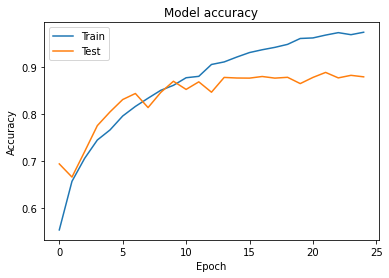

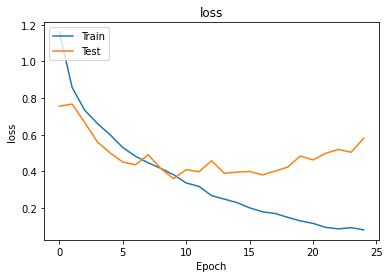

In [ ]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('loss')
plot.ylabel('loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
model_3.evaluate(x_test,y_test, verbose=1)

94/94 [==============================] - 10s 102ms/step - loss: 11.0358 - accuracy: 0.5420


[11.03580379486084, 0.5419999957084656]

In [ ]:
model_3.save("third_model.h5")

Lets predict the images from the "test" folder. With our 3rd model 

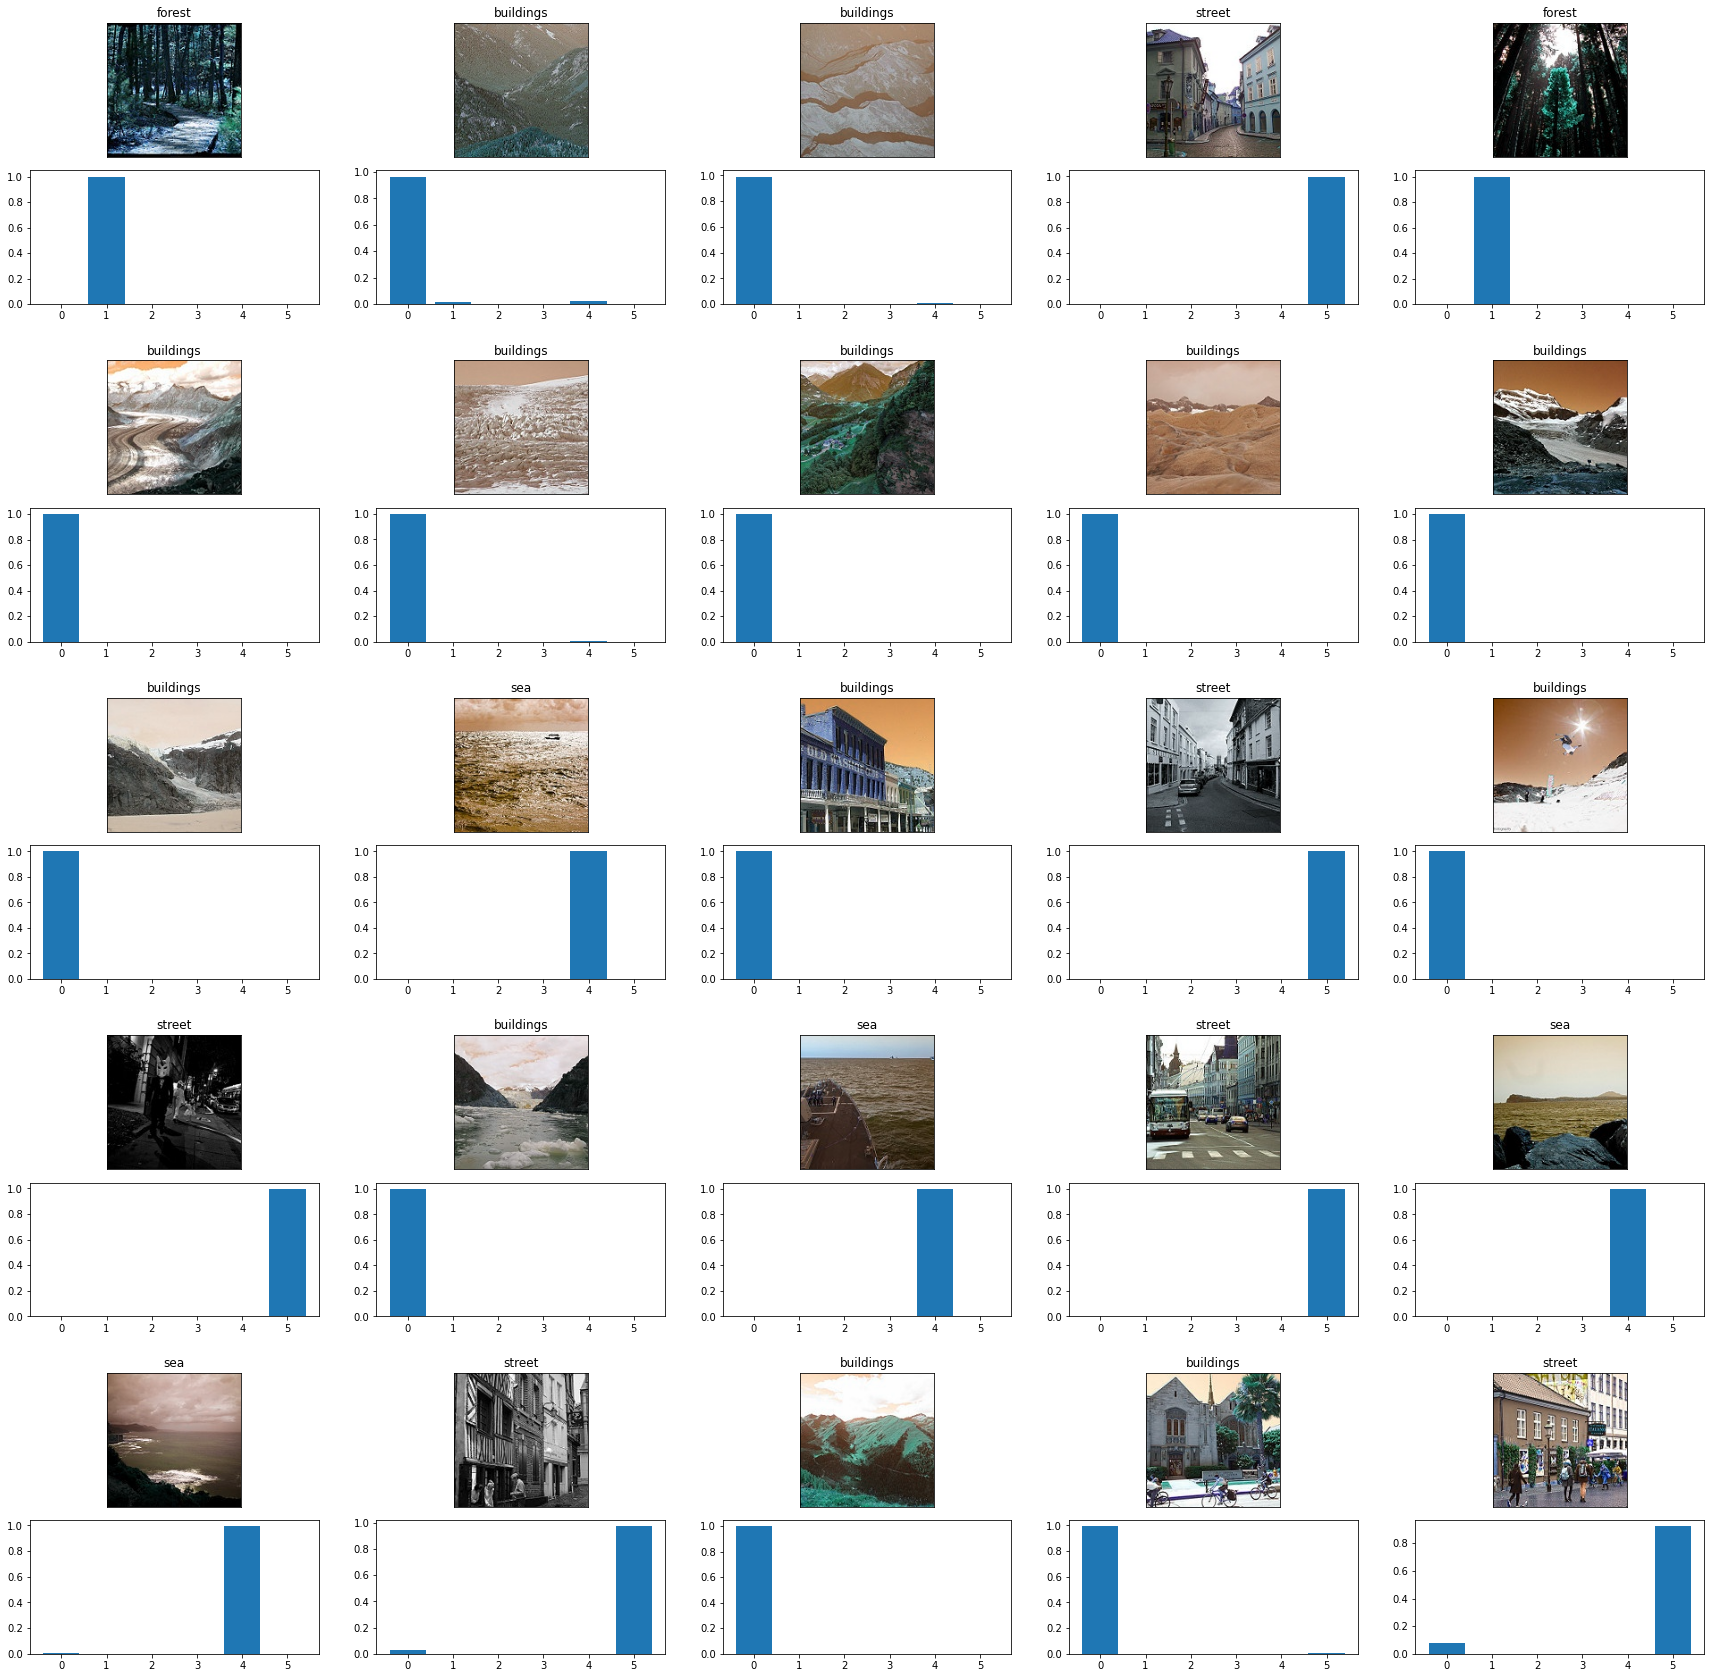

In [ ]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(x_test))
    pred_image = np.array([x_train[rnd_number]])
    pred_class = get_classlabel(np.argmax((model_3.predict(pred_image)[0])))
    pred_prob = model_3.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

Lets predict the images from the "test" folder. With our 2nd model 

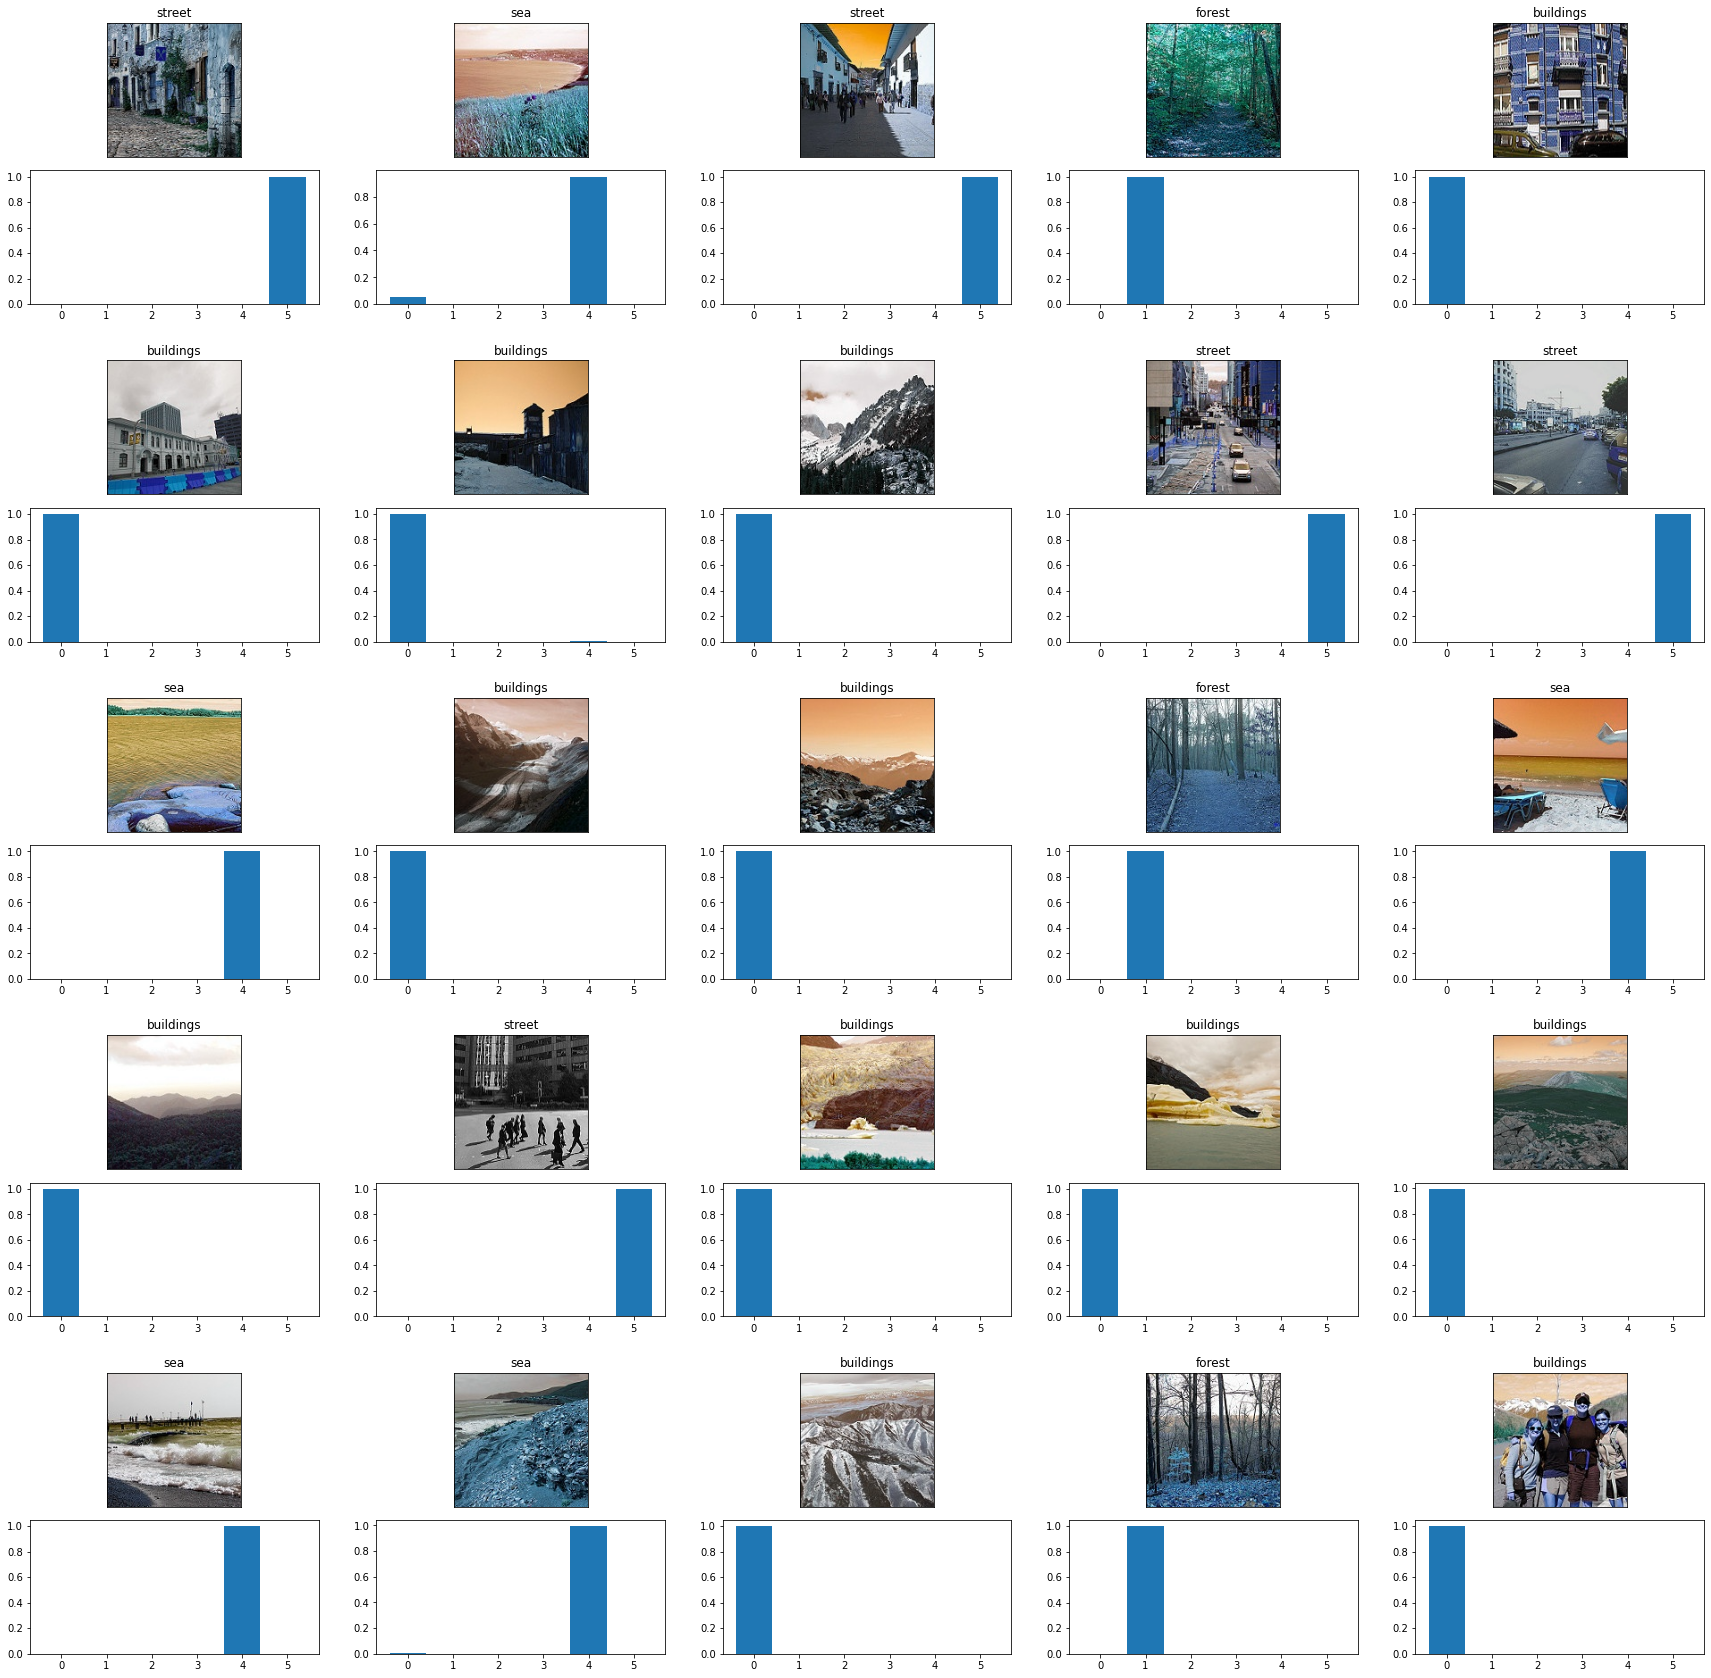

In [ ]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(x_test))
    pred_image = np.array([x_test[rnd_number]])
    pred_class = get_classlabel(np.argmax((model2.predict(pred_image)[0])))
    pred_prob = model2.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

Lets predict the images from the "test" folder. With our 1st model 

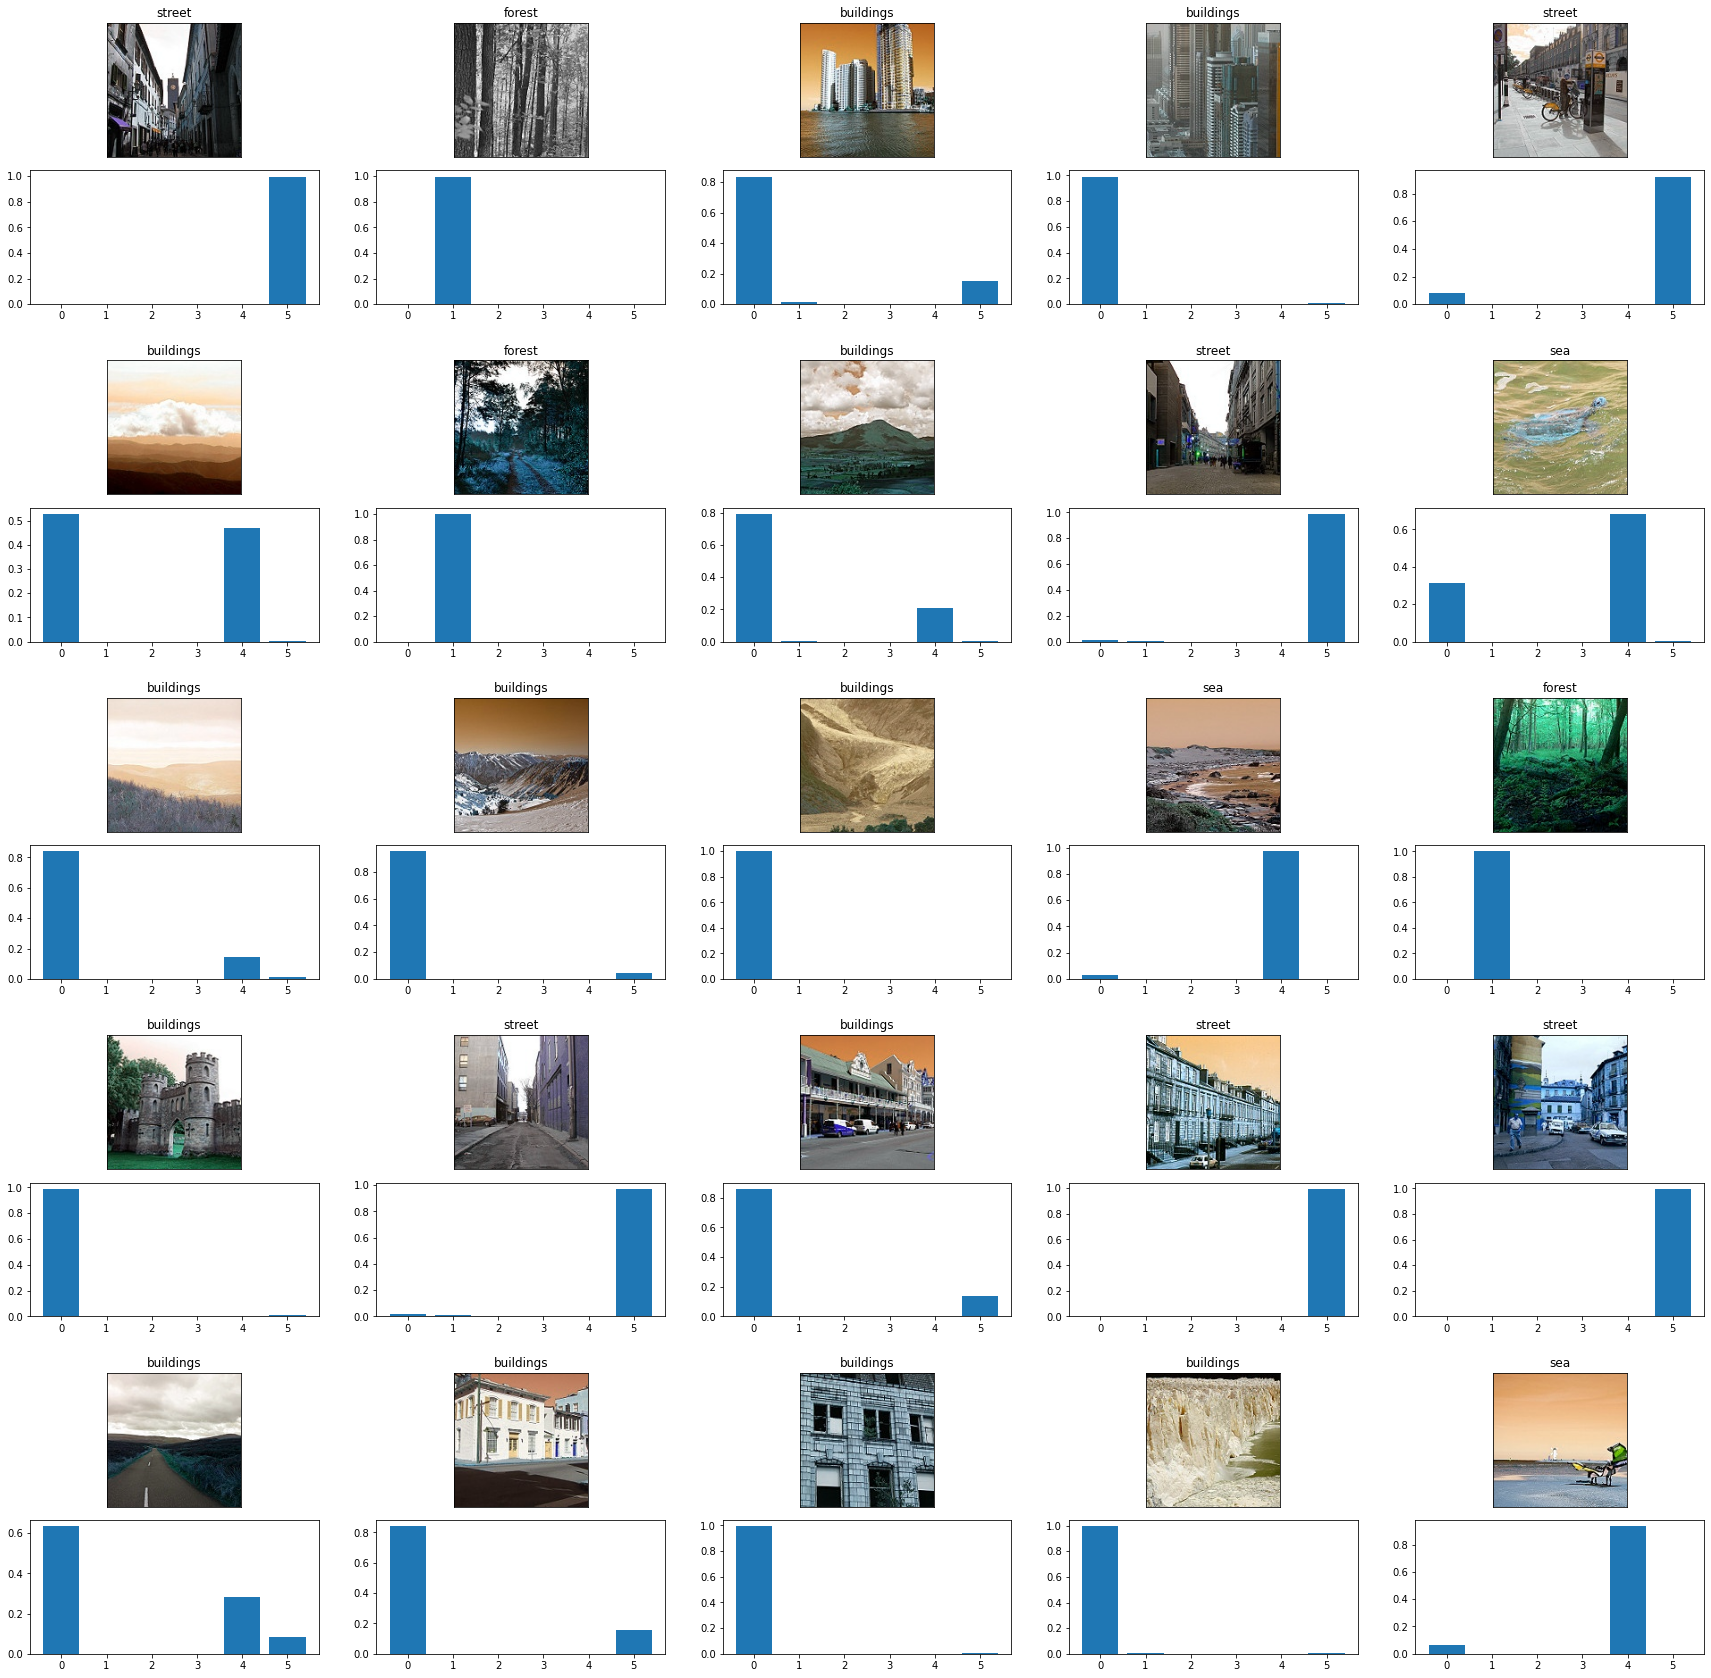

In [ ]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(x_test))
    pred_image = np.array([x_train[rnd_number]])
    pred_class = get_classlabel(np.argmax((model.predict(pred_image)[0])))
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [ ]:
from tensorflow.keras.applications import ResNet50


pretrained_model=ResNet50( input_shape=(150,150,3),
                                  include_top=False,
                                  weights='imagenet'
                                   )
#step2
for layer in pretrained_model.layers:
     layer.trainable = False

In [ ]:
from tensorflow.keras import layers
last_layer = pretrained_model.get_layer('conv5_block3_out')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output

#step4
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)
from tensorflow.keras import Model
#step5
model_resnet = Model(pretrained_model.input, x) 

#step6
model_resnet.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

last layer of vgg : output shape:  (None, 5, 5, 2048)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model_resnet.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
423/423 [==============================] - 40s 85ms/step - loss: 0.5488 - acc: 0.9236 - val_loss: 8.2250 - val_acc: 0.6063
Epoch 2/10
423/423 [==============================] - 35s 82ms/step - loss: 0.2072 - acc: 0.9633 - val_loss: 13.1270 - val_acc: 0.6067
Epoch 3/10
423/423 [==============================] - 35s 83ms/step - loss: 0.1293 - acc: 0.9777 - val_loss: 15.1527 - val_acc: 0.6143
Epoch 4/10
423/423 [==============================] - 35s 83ms/step - loss: 0.0975 - acc: 0.9845 - val_loss: 20.4470 - val_acc: 0.6107
Epoch 5/10
423/423 [==============================] - 35s 83ms/step - loss: 0.0799 - acc: 0.9879 - val_loss: 22.5234 - val_acc: 0.6133
Epoch 6/10
423/423 [==============================] - 35s 84ms/step - loss: 0.0605 - acc: 0.9913 - val_loss: 24.4144 - val_acc: 0.6107
Epoch 7/10
423/423 [==============================] - 36s 85ms/step - loss: 0.0374 - acc: 0.9942 - val_loss: 25.3616 - val_acc: 0.6110
Epoch 8/10
423/423 [==============================] - 36

In [ ]:
model_resnet.es

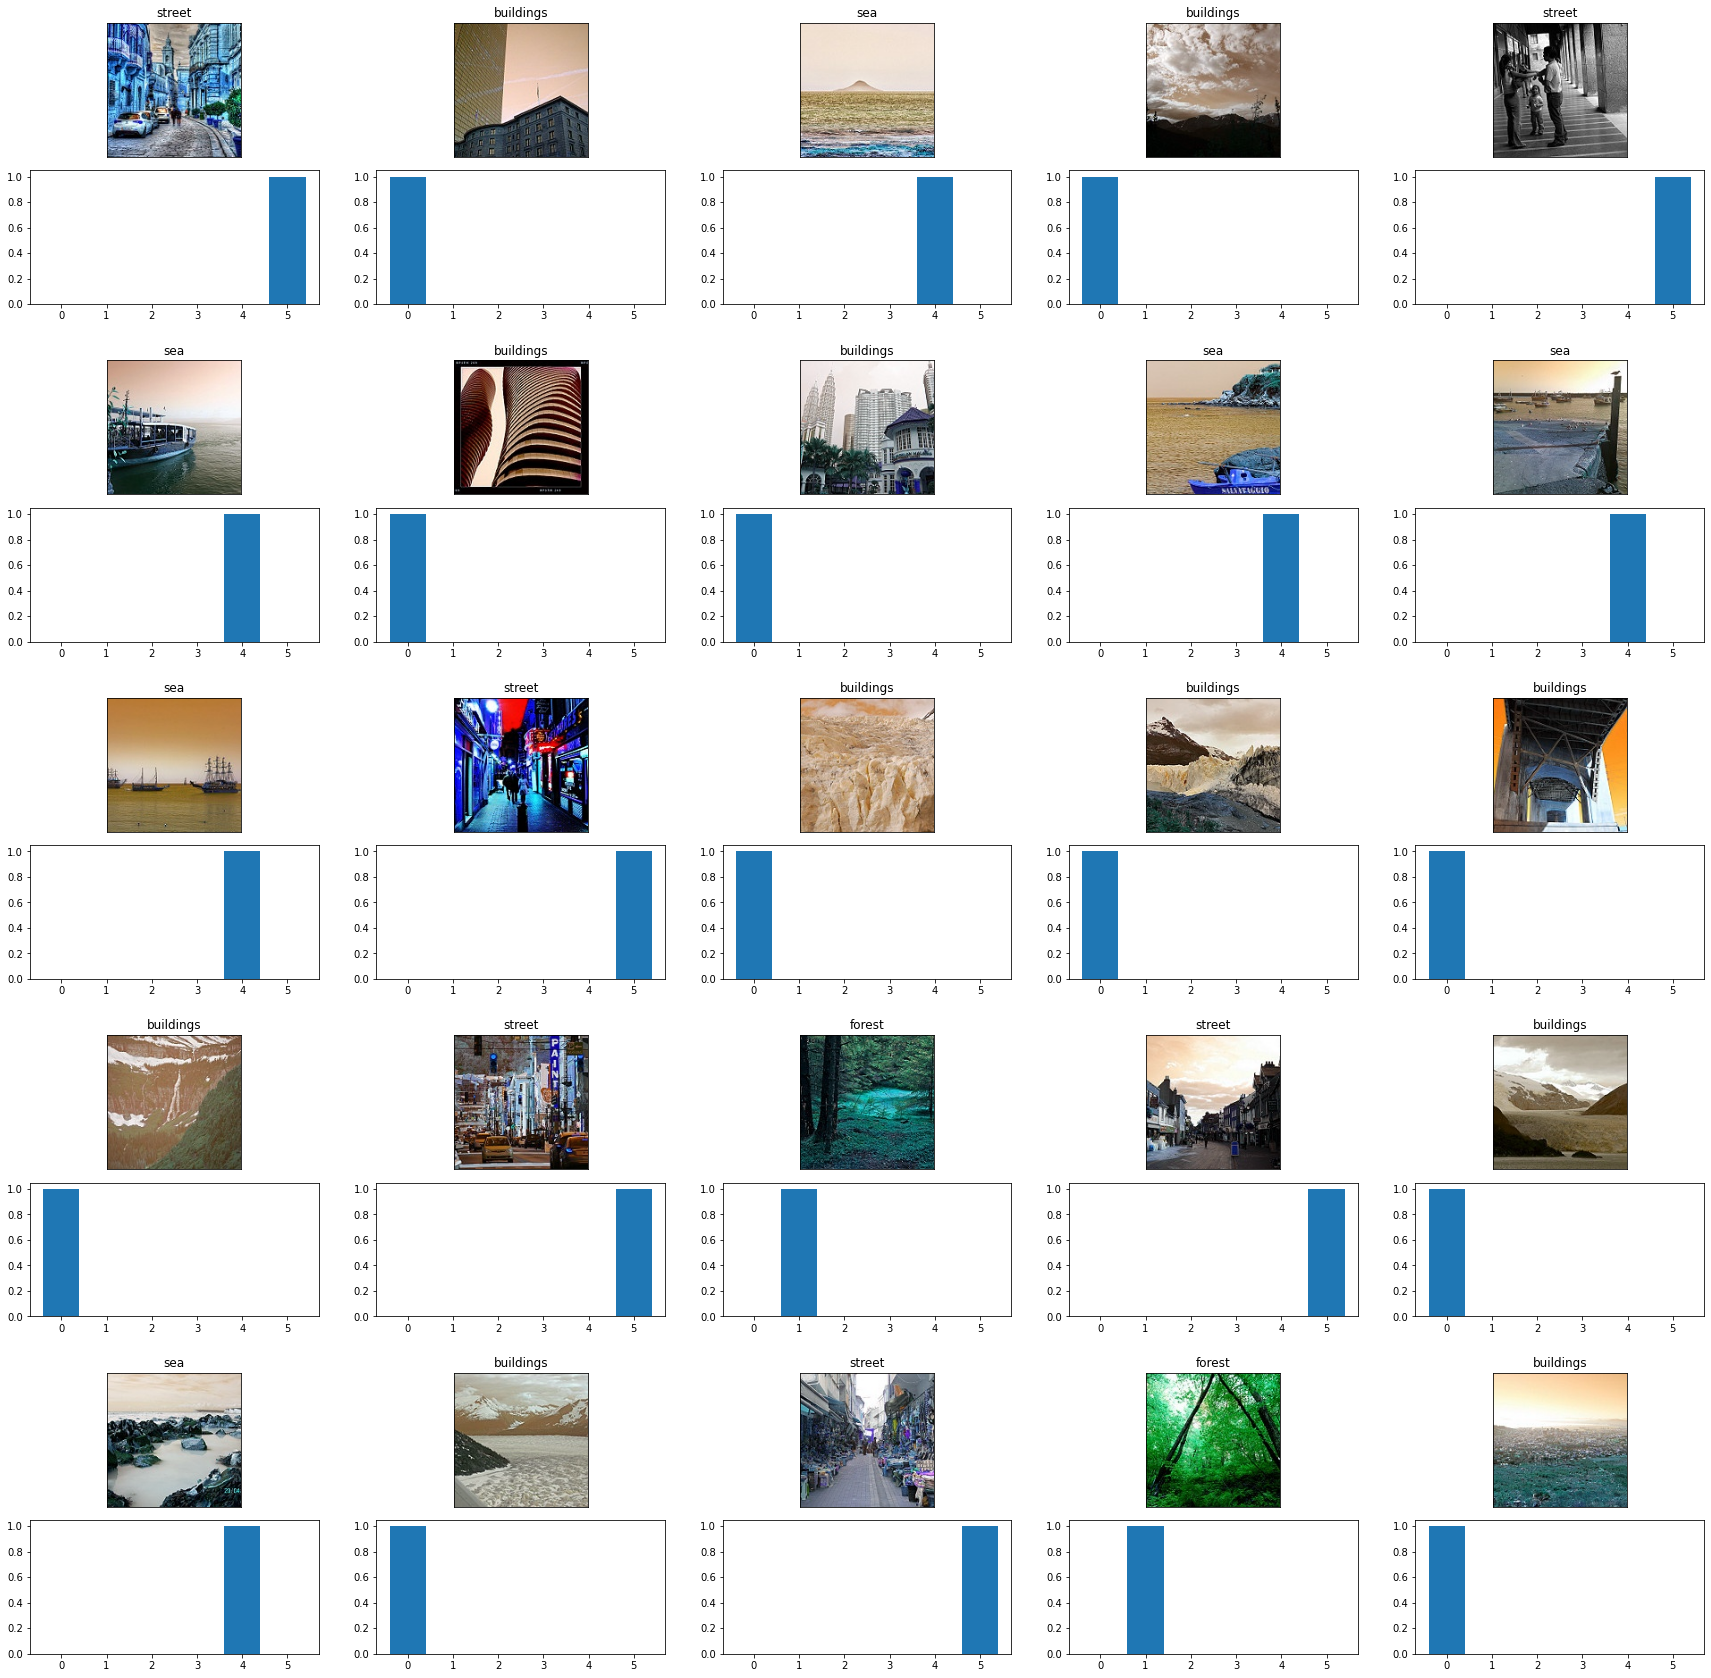

In [ ]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(x_test))
    pred_image = np.array([x_train[rnd_number]])
    pred_class = get_classlabel(np.argmax((model_resnet.predict(pred_image)[0])))
    pred_prob = model_resnet.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()